https://github.com/Bayer-Group/paquo/tree/152e87d548eee52192022b0326c61456f33afc20/examples


In [33]:
from paquo.projects import QuPathProject
from paquo.images import QuPathImageType
from qp_functions import create_qp_project, add_images_to_project, create_metadata_list


In [34]:
#Hardcoded example variables for project creation

#A location, this does not have to exist yet
qpproj_dir_path = 'D:\Python\paquo\qppaquo2'
#Locations of images for the project, expecting whole slide image types
#these need to exist
image_dir = 'D:/Python/paquo/images'
image_dir2 = 'D:/Python/paquo/images2'
image_dir3 = 'D:/Python/paquo/images_20x'

In [35]:
metadata = {
    "PDAC_MetroHealth_362-4x-bf.ome.tif": {
        "acquisition": "4x",
        "diagnosis": "PDAC",
    },
    "PDAC_MetroHealth_N342L31-4x-bf.ome.tif": {
        "acquisition": "4x",
        "diagnosis": "PDAC",
    },
    "PDAC_MetroHealth_N362L124-20x--5505_1777.ome.tif": {
        "acquisition": "20x",
        "diagnosis": "normal",
    },
    "PDAC_MetroHealth_N362L124-20x--6094_3630.ome.tif": {
        "acquisition": "20x",
        "diagnosis": "normal",
    }
}

In [36]:
#metadata = None

In [37]:
#Creating metadata for a new set of 20x acquisitions
metadata_20x = create_metadata_list(image_dir3, "20x", "PDAC")
metadata_20x

{'PDAC_MetroHealth_003_a-20x--10935_5058.ome.tif': {'acquisition': '20x',
  'diagnosis': 'PDAC'}}

In [38]:
metadata_20x = {'PDAC_MetroHealth_003_a-20x--10935_5058.ome.tif': {'acquisition': '20x',
  'diagnosis': '1'},}
 # 'PDAC_MetroHealth_003_a-20x--16382_8206.ome.tif': {'acquisition': '20x',
 #  'diagnosis': '2'},
 # 'PDAC_MetroHealth_003_a-20x--5485_5949.ome.tif': {'acquisition': '20x',
 #  'diagnosis': '3'},
 # 'PDAC_MetroHealth_040-20x--10264_7189.ome.tif': {'acquisition': '20x',
 #  'diagnosis': '4'},
 # 'PDAC_MetroHealth_137-20x--10424_4910.ome.tif': {'acquisition': '20x',
 #  'diagnosis': '5'}}

In [39]:
qp = create_qp_project(qpproj_dir_path, image_dir, metadata)

No matching downsample for thumbnail! This might take a long time...


created qppaquo2
metadata found


No matching downsample for thumbnail! This might take a long time...


PDAC_MetroHealth_362-4x-bf.ome.tif
{'acquisition': '4x', 'diagnosis': 'PDAC'}
PDAC_MetroHealth_N342L31-4x-bf.ome.tif
{'acquisition': '4x', 'diagnosis': 'PDAC'}


No matching downsample for thumbnail! This might take a long time...


PDAC_MetroHealth_N362L124-20x--5505_1777.ome.tif
{'acquisition': '20x', 'diagnosis': 'normal'}
PDAC_MetroHealth_N362L124-20x--6094_3630.ome.tif
{'acquisition': '20x', 'diagnosis': 'normal'}
QuPath project created successfully in D:\Python\paquo\qppaquo2


In [40]:
add_images_to_project(qp, image_dir3, metadata_20x)

No matching downsample for thumbnail! This might take a long time...


metadata found
PDAC_MetroHealth_003_a-20x--10935_5058.ome.tif
{'acquisition': '20x', 'diagnosis': '1'}


'Images added to the QuPath project successfully.'

In [ ]:
*CURRENT MAJOR BUG, LAST METADATA IS MISSING

**RUN QUPATH**

In [1]:
from paquo._config import settings, to_kwargs
from paquo.jpype_backend import start_jvm, JClass

args = to_kwargs(settings)
qupath_version = start_jvm(finder_kwargs=args)
print(qupath_version)

import jpype
import jpype.imports
import java
import javax
from javax.swing import *

qupathGUI = JClass('qupath.lib.gui.QuPathGUI')

@jpype.JImplements(java.lang.Runnable)
class launchQuPath:
    @jpype.JOverride
    def run(self):
        qupathGUI.launchQuPath()
        


0.4.3


In [5]:
javax.swing.SwingUtilities.invokeLater(launchQuPath())

In [2]:
#Test control - works
qupath = qupathGUI.getInstance()
print(qupath)
print(qupath.getProject())
qupath.getViewer().zoomIn(10)

qupath.lib.gui.QuPathGUI@45cb5ea0
Project: qppaquo2-project


Current issues
Not able to open a specific Project/image
Closing QuPath once prevents it from being re-opened.


In [18]:

current_project_file = os.path.join(qpproj_dir_path 'project.qpproj')

qp = QuPathProject(current_project_file, mode='a')


No matching downsample for thumbnail! This might take a long time...


ImageEntries(['OS-2.ndpi', 'OS-3.ndpi', 'Copy of 88_region_2_original.tif', 'Copy of 40_region_4_original.tif'])
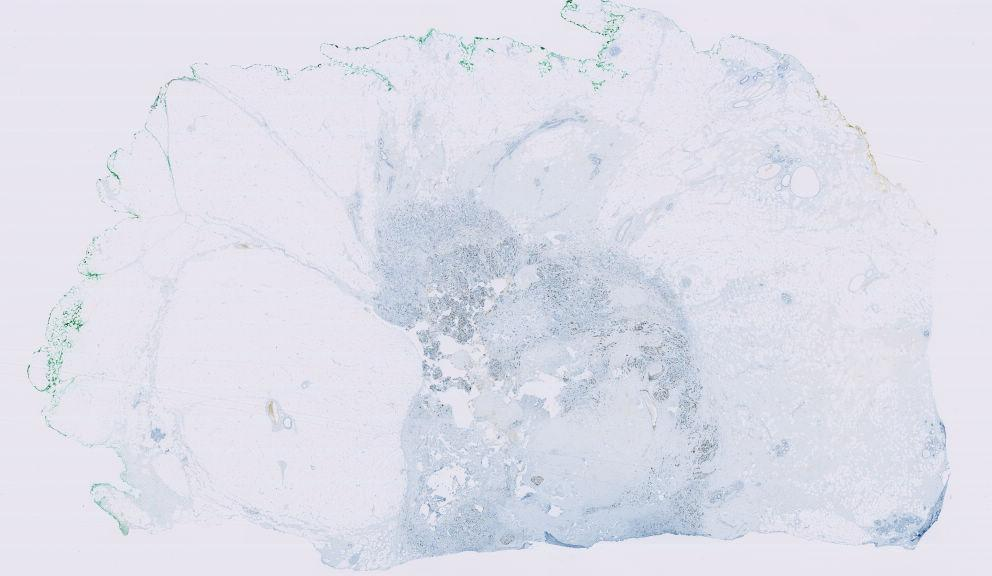
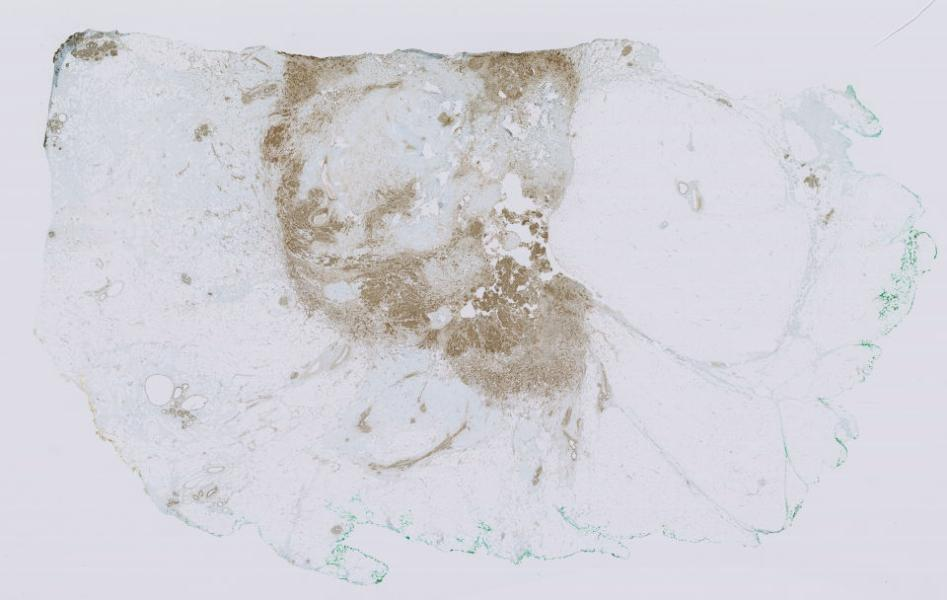
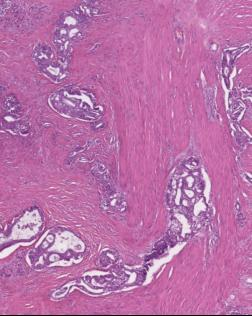
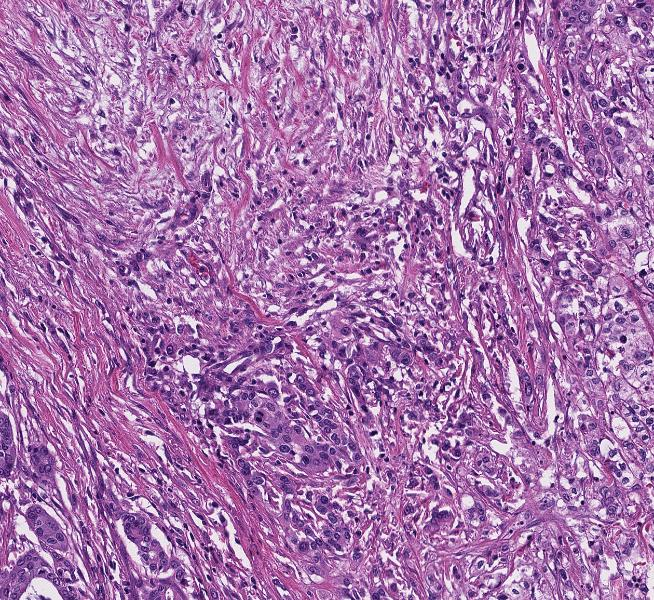

In [15]:

qp.images
qp.add_image('D:\QuPath_projects\PDAC_CP annotation validation\image_export\Copy of 40_region_4_original.tif', image_type=QuPathImageType.BRIGHTFIELD_H_E)
qp.images

In [19]:
"""example showing how to read annotations from an existing project"""
from pathlib import Path
from paquo.projects import QuPathProject

#EXAMPLE_PROJECT = Path(__file__).parent.absolute() / "projects" / "example_01_project"

# read the project and raise Exception if it's not there
with QuPathProject(current_project, mode='r') as qp:
    print("opened", qp.name)
    # iterate over the images
    for image in qp.images:
        # annotations are accessible via the hierarchy
        annotations = image.hierarchy.annotations

        print("Image", image.image_name, "has", len(annotations), "annotations.")
        for annotation in annotations:
            # annotations are paquo.pathobjects.QuPathPathAnnotationObject instances
            # their ROIs are accessible as shapely geometries via the .roi property
            print("> class:", annotation.path_class.name, "roi:", annotation.roi)

    print("done")

opened qppaquo
Image OS-2.ndpi has 0 annotations.
Image OS-3.ndpi has 0 annotations.
Image Copy of 88_region_2_original.tif has 0 annotations.
done


No matching downsample for thumbnail! This might take a long time...


In [ ]:
"""example showing how to draw a tile detection overlay over an image"""
import itertools
import math
import random
from pathlib import Path
from typing import Tuple, Iterator

from shapely.geometry import Polygon

from paquo.images import QuPathImageType
from paquo.projects import QuPathProject

EXAMPLE_PROJECT = Path(__file__).parent.absolute() / "projects" / "example_05_project"
EXAMPLE_IMAGE = Path(__file__).parent.absolute() / "images" / "image_1.svs"


def measurement(x, y, w, h, a=8) -> float:
    """some measurement that you want to display"""
    v = math.exp(-a * ((2 * x / w - 1) ** 2 + (2 * y / h - 1) ** 2))
    v += random.uniform(-0.1, 0.1)
    return min(max(0., v), 1.)


def iterate_grid(width, height, grid_size) -> Iterator[Tuple[int, int]]:
    """return corner x,y coordinates for a grid"""
    yield from itertools.product(
        range(0, width, grid_size),
        range(0, height, grid_size)
    )


with QuPathProject(EXAMPLE_PROJECT, mode='x') as qp:
    print("created", qp.name)
    # add an image
    entry = qp.add_image(
        EXAMPLE_IMAGE,
        image_type=QuPathImageType.BRIGHTFIELD_H_E
    )

    tile_size = 50
    img_width = entry.width
    img_height = entry.height

    # iterate over the image in a grid pattern
    for x0, y0 in iterate_grid(img_width, img_height, grid_size=tile_size):
        tile = Polygon.from_bounds(x0, y0, x0 + tile_size, y0 + tile_size)
        # add tiles (tiles are specialized detection objects drawn without border)
        detection = entry.hierarchy.add_tile(
            roi=tile,
            measurements={
                'measurement': measurement(x0, y0, img_width, img_height)
            }
        )

    print("added", len(entry.hierarchy.detections), "tiles")
    print(f"done. Please look at {qp.name} in QuPath and look at 'Measure > Show Measurement Maps'")

In [ ]:
qp = JClass('qupath.lib.gui.scripting.QPEx')
qp.setBatchProjectAndImage(qupath.getProject(), qupath.getImageData())

pathObject = qp.getSelectedObject()
pathObject.setPathClass(qp.getPathClass('Stroma'))
qp.fireHierarchyUpdate()